Test if L1 normalizing Largrange Multipliers improve SVM by reducing number of support vector 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.stats import bernoulli

from classification.classifier import SVM
from classification.optimizer import QpDuel

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

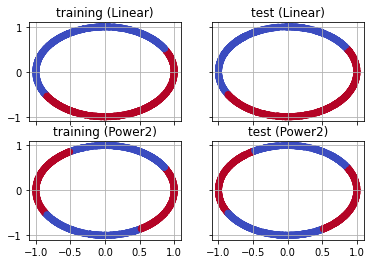

In [2]:
# generate data
num_data = 1000
num_test = 100
theta = np.pi/3
d = 2
C = 1/10
error_rate = 0.0

# training data
X = np.random.rand(num_data, d)
X = X - np.mean(X, 0) # standarderize E[X]=0
X = np.array([x/np.linalg.norm(x) for x in X]) # normalize ||X||=1

# test data
Xtest = np.random.rand(num_data, d)
Xtest = Xtest - np.mean(Xtest, 0) # standarderize E[Xtest]=0
Xtest = np.array([xtest/np.linalg.norm(xtest) for xtest in Xtest]) # normalize ||Xtest||=1

# bit flip label error
err = (-1)**bernoulli.rvs(error_rate, loc=0, size=num_data)

# label for linear kernel
y_linear = np.array([np.sign(x[0]) for x in rotation2D(theta, X.T).T])*err
ytest_linear = np.array([np.sign(x[0]) for x in rotation2D(theta, Xtest.T).T])

# label for power2 kernel
y_power2 = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(theta, X.T).T])*err
ytest_power2 = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(theta, Xtest.T).T])

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
data = [X, Xtest, X, Xtest]
label = [y_linear, ytest_linear, y_power2, ytest_power2]
subtitle = ['training (Linear)', 'test (Linear)','training (Power2)','test (Power2)']
for i in range(len(ax)):
    ax[i].scatter(data[i][:,0], data[i][:,1], c=label[i], cmap=plt.cm.coolwarm)
    ax[i].grid()
    ax[i].set_title(subtitle[i])

In [3]:
linker = lambda X, Y: X@Y.T
cls_lin = SVM(X, y_linear, kernel= linker, name='linear kernel')
cls_lin_n = SVM(X, y_linear, kernel= linker, name='linear kernel (normalized)')
cls_lin.optimize(QpDuel, C=C, Probability=False)
cls_lin_n.optimize(QpDuel, C=C, Probability=True)

cls_pw2 = SVM(X, y_power2, kernel= 'power2', name='power2 kernel')
cls_pw2_n = SVM(X, y_power2, kernel= 'power2', name='power2 kernel (normalized)')
cls_pw2.optimize(QpDuel, C=C, Probability=False)
cls_pw2_n.optimize(QpDuel, C=C, Probability=True)

     pcost       dcost       gap    pres   dres
 0: -1.0032e+02 -1.6311e+02  5e+03  2e+01  4e-15
 1: -1.7322e+01 -1.4767e+02  2e+02  5e-01  3e-15
 2: -1.1632e+01 -4.0945e+01  4e+01  5e-02  1e-15
 3: -1.2473e+01 -1.7344e+01  6e+00  8e-03  2e-15
 4: -1.3442e+01 -1.4608e+01  1e+00  1e-03  1e-15
 5: -1.3671e+01 -1.4088e+01  5e-01  4e-04  1e-15
 6: -1.3757e+01 -1.3921e+01  2e-01  1e-04  1e-15
 7: -1.3793e+01 -1.3858e+01  7e-02  5e-05  1e-15
 8: -1.3812e+01 -1.3827e+01  2e-02  6e-06  1e-15
 9: -1.3818e+01 -1.3820e+01  2e-03  3e-07  1e-15
10: -1.3819e+01 -1.3819e+01  2e-05  3e-09  1e-15
11: -1.3819e+01 -1.3819e+01  2e-07  3e-11  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9991e-01 -1.0134e+02  2e+03  1e+01  9e-16
 1: -9.9933e-01 -8.4476e+01  1e+02  2e-01  1e-15
 2: -9.1860e-01 -3.3882e+00  3e+00  1e-03  1e-15
 3: -9.3393e-01 -1.3651e+00  4e-01  2e-04  9e-16
 4: -9.6498e-01 -1.1992e+00  2e-01  2e-05  9e-16
 5: -9.8737e-01 -1.0404e+00  5e-02  4e-06  1e-1

In [4]:
compare_linAndpower2_Normalized_sv, ax = plt.subplots(2,2, sharex=True, sharey=True)
clses = [cls_lin, cls_lin_n, cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    clses[i].plot(ax[i], sv=True)

compare_linAndpower2_Normalized_, ax = plt.subplots(2,2, sharex=True, sharey=True)
clses = [cls_lin, cls_lin_n, cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    clses[i].plot(ax[i], sv=False)

compare_linAndpower2_Normalized_alpha, ax = plt.subplots(2,2, sharex=True, sharey=False)
clses = [cls_lin, cls_lin_n, cls_pw2, cls_pw2_n]
ax=ax.flatten()
for i in range(len(ax)):
    ax[i].plot(clses[i].alpha)
    ax[i].set_title(clses[i].name)

ValueError: Illegal argument(s) to subplot: (2, 2)

In [5]:
clses = [cls_lin, cls_lin_n, cls_pw2, cls_pw2_n]
test_label = [ytest_linear, ytest_linear, ytest_power2, ytest_power2]
for i in range(len(clses)):
    print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(Xtest, test_label[i]))

Performance of linear kernel is 0.96
Performance of linear kernel (normalized) is 0.99
Performance of power2 kernel is 0.94
Performance of power2 kernel (normalized) is 0.99
